## 필요한 모듈

이 프로젝트를 위해서는 아래의 모듈이 필요하다. 

> numpy, pandas, matplotlib, astropy, version_information

### 모듈 설치

1. 콘솔 창에서 모듈을 설치할 때는 아래와 같은 형식으로 입력하면 된다.

>pip install module_name==version

>conda install module_name==version

2. 주피터 노트북(코랩 포함)에 설치 할 때는 아래의 셀을 실행해서 실행되지 않은 모듈을 설치할 수 있다. (pip 기준) 만약 아나콘다 환경을 사용한다면 7행을 콘다 설치 명령어에 맞게 수정하면 된다.

In [31]:
# Install a pip package in the current Jupyter kernel
import importlib, sys, subprocess
print(f"sys.executable: {sys.executable}")

packages = "numpy, pandas, matplotlib, scipy, astropy, photutils, ccdproc, version_information" # required modules
pkgs = packages.split(", ")
for pkg in pkgs :
    if not importlib.util.find_spec(pkg):
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', pkg, '-q'])
        print(f"**** {pkg} module is now installed.")
    else: 
        print(f"******** {pkg} module is already installed.")
%load_ext version_information
import time
now = time.strftime("%Y-%m-%d %H:%M:%S (%Z = GMT%z)")
print(f"This notebook was generated at {now} ")

vv = %version_information {packages}
for i, pkg in enumerate(vv.packages):
    print(f"{i} {pkg[0]:10s} {pkg[1]:s}")


sys.executable: /home/guitar79/anaconda3/envs/astro_Python_env/bin/python
******** numpy module is already installed.
******** pandas module is already installed.
******** matplotlib module is already installed.
******** scipy module is already installed.
******** astropy module is already installed.
******** photutils module is already installed.
******** ccdproc module is already installed.
******** version_information module is already installed.
The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information
This notebook was generated at 2024-09-08 10:28:49 (KST = GMT+0900) 
0 Python     3.12.3 64bit [GCC 11.2.0]
1 IPython    8.25.0
2 OS         Linux 5.15.0 119 generic x86_64 with glibc2.31
3 numpy      1.26.4
4 pandas     2.2.2
5 matplotlib 3.8.4
6 scipy      1.13.1
7 astropy    6.1.0
8 photutils  1.12.0
9 ccdproc    2.4.2
10 version_information 1.0.4


### 모듈 버전 확인

아래 셀을 실행하면 이 노트북을 실행한 파이썬 및 관련 모듈의 버전을 확인할 수 있다.

### import modules

In [32]:
from glob import glob
from pathlib import Path
import os
import numpy as np
import astropy.units as u
#from astropy.stats import sigma_clip
#from ccdproc import combine, ccd_process, CCDData
from astropy.io import fits
import matplotlib.pyplot as plt

import ysfitsutilpy as yfu
#import ysphotutilpy as ypu
#import ysvisutilpy as yvu

import _astro_utilities
import _Python_utilities

"CAL-BDF" 폴더 찾기

In [33]:
#%%
BASEDIR = Path("/mnt/Rdata/ASTRO_data") 
PROJECDIR = BASEDIR/ "2024-Spectra"
TODODIR = PROJECDIR / "TEC140_ASI183MMPro_2024-05_1bin"
# TODODIR = PROJECDIR / "_-_-_2024-06_-_GSON300_STF-8300M_-_1bin"


DOINGDIRs = sorted(_Python_utilities.getFullnameListOfsubDirs(TODODIR))
print ("DOINGDIRs: ", format(DOINGDIRs))
print ("len(DOINGDIRs): ", format(len(DOINGDIRs)))

MASTERDIR = [x for x in DOINGDIRs if "CAL-BDF" in str(x)]
MASTERDIR = Path(MASTERDIR[0]) / _astro_utilities.master_dir
print ("MASTERDIR: ", format(MASTERDIR))

BDFDIR = [x for x in DOINGDIRs if "SPTR-CAL_" in str(x)]
print ("BDFDIR: ", format(BDFDIR))

DOINGDIRs = sorted([x for x in DOINGDIRs if "_LIGHT_" in str(x)])
DOINGDIRs = sorted([x for x in DOINGDIRs if not "SPTR-CAL_" in str(x)])
print ("DOINGDIRs: ", format(DOINGDIRs))
print ("len(DOINGDIRs): ", format(len(DOINGDIRs)))

# filter_str = '2024-08-30'
# DOINGDIRs = [x for x in DOINGDIRs if filter_str in x]
# remove = 'BIAS'
# DOINGDIRs = [x for x in DOINGDIRs if remove not in x]
# remove = 'DARK'
# DOINGDIRs = [x for x in DOINGDIRs if remove not in x]
# remove = 'FLAT'
# DOINGDIRs = [x for x in DOINGDIRs if remove not in x]
print ("DOINGDIRs: ", DOINGDIRs)
print ("len(DOINGDIRs): ", len(DOINGDIRs))
#######################################################

DOINGDIRs:  ['/mnt/Rdata/ASTRO_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/-_CAL-BDF_-_2024-05-14_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/ASTRO_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-CAL_LIGHT_-_2024-05-14_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/ASTRO_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-HIP24608-CAPELA_LIGHT_-_2024-04-26_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/ASTRO_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-HIP27989-BETELGEUSE_LIGHT_-_2024-05-01_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/ASTRO_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-HIP31681-ALHENA_LIGHT_-_2024-05-01_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/ASTRO_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-HIP32246-MEBSUTA_LIGHT_-_2024-05-01_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/ASTRO_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-HIP32349-SIRIUS_LIGHT_-_2024-04-26_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/ASTRO_data/2024-Spectra/TE

## light Summary

In [34]:
for DOINGDIR in DOINGDIRs[:3] :
    DOINGDIR = Path(DOINGDIR)
    print("DOINGDIR", DOINGDIR)

    summary = yfu.make_summary(DOINGDIR/"reduced" / "*.fit*")
    if summary is not None : 
        #print(summary)
        print("len(summary):", len(summary))
        print("summary:", summary)
        #print(summary["file"][0])

DOINGDIR /mnt/Rdata/ASTRO_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-HIP24608-CAPELA_LIGHT_-_2024-04-26_-_TEC140_ASI183MMPro_-_1bin
All 51 keywords (guessed from /mnt/Rdata/ASTRO_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-HIP24608-CAPELA_LIGHT_-_2024-04-26_-_TEC140_ASI183MMPro_-_1bin/reduced/SPTR-HIP24608-CAPELA_LIGHT__2024-04-26-12-11-33_5sec_TEC140_ASI183MMPro_-20c_1bin.fit) will be loaded.
len(summary): 62
summary:                                                  file  filesize  SIMPLE  \
0   /mnt/Rdata/ASTRO_data/2024-Spectra/TEC140_ASI183...  80732160    True   
1   /mnt/Rdata/ASTRO_data/2024-Spectra/TEC140_ASI183...  80732160    True   
2   /mnt/Rdata/ASTRO_data/2024-Spectra/TEC140_ASI183...  80732160    True   
3   /mnt/Rdata/ASTRO_data/2024-Spectra/TEC140_ASI183...  80732160    True   
4   /mnt/Rdata/ASTRO_data/2024-Spectra/TEC140_ASI183...  80732160    True   
..                                                ...       ...     ...   
57  /mnt/Rdata/ASTR

### 분광 자료 display



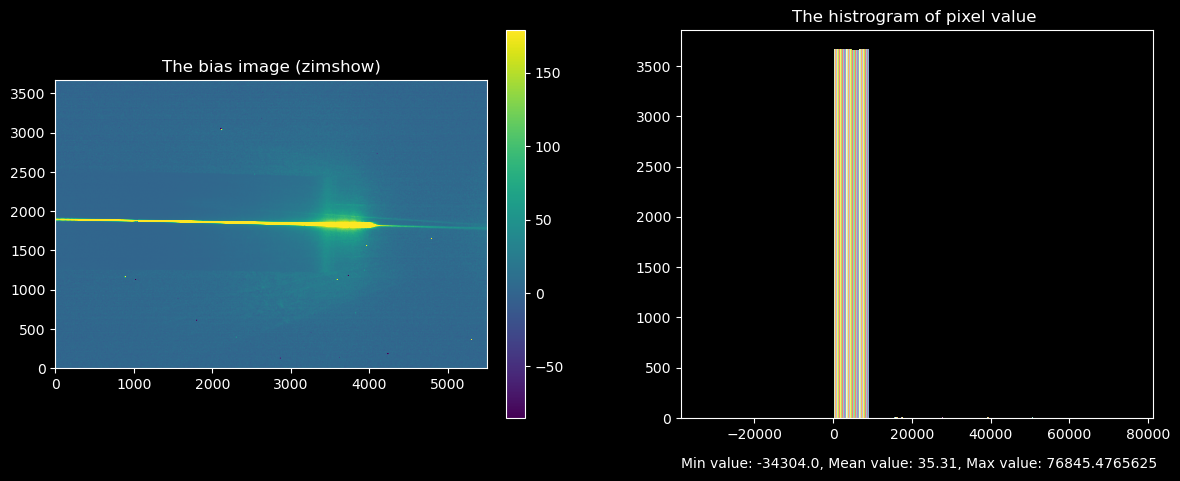

In [16]:
fpath = Path(summary["file"][0])
hdul = fits.open(fpath)

fig, axs = plt.subplots(1, 2, figsize=(13, 6), sharex=False, sharey=False, gridspec_kw=None)

im1 = _astro_utilities.zimshow(axs[0], 
                    hdul[0].data,
                    origin="lower",
                    cmap = "viridis"
                    )
im2 = axs[1].hist(hdul[0].data,
                )

axs[0].set_title('The bias image (zimshow)')
axs[1].set_title('The histrogram of pixel value ')

plt.annotate(f"Min value: {hdul[0].data.min()}, Mean value: {hdul[0].data.mean():.02f}, Max value: {hdul[0].data.max()}", xy=(0, -50), xycoords='axes pixels')

plt.colorbar(im1, fraction=0.0455, pad=0.04)
plt.tight_layout(pad=5.0)

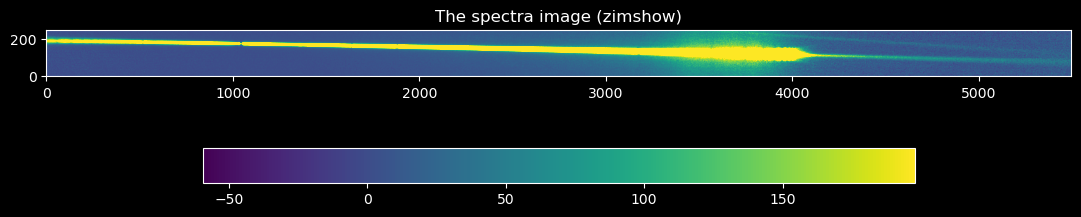

In [17]:
fpath = Path(summary["file"][0])
hdul = fits.open(fpath)

fig, axs = plt.subplots(1, 1, figsize=(12, 4), sharex=False, sharey=False, gridspec_kw=None)

im1 = _astro_utilities.zimshow(axs, 
                                hdul[0].data[1700:1950, :],
                                origin="lower",
                                cmap = "viridis",
                                )

axs.set_title('The spectra image (zimshow)')

plt.colorbar(im1, fraction=0.15, pad=0.3, location='bottom')
plt.tight_layout(pad=5.0)

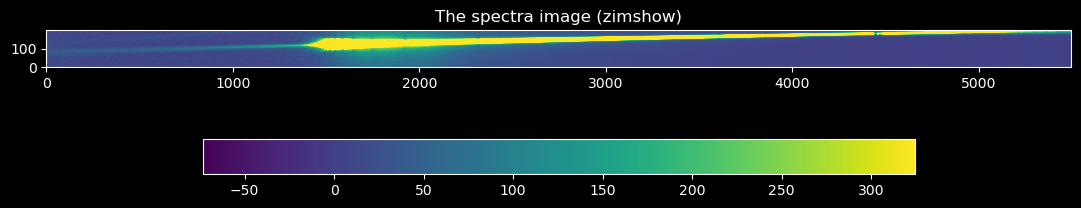

In [18]:
fpath = Path(summary["file"][3])
hdul = fits.open(fpath)

fig, axs = plt.subplots(1, 1, figsize=(12, 4), sharex=False, sharey=False, gridspec_kw=None)

im1 = _astro_utilities.zimshow(axs, 
                                np.flip(hdul[0].data[1700:1900, :], axis=1), # flip horizental
                                origin="lower",
                                cmap = "viridis",
                                )

axs.set_title('The spectra image (zimshow)')

plt.colorbar(im1, fraction=0.15, pad=0.3, location='bottom')
plt.tight_layout(pad=5.0)

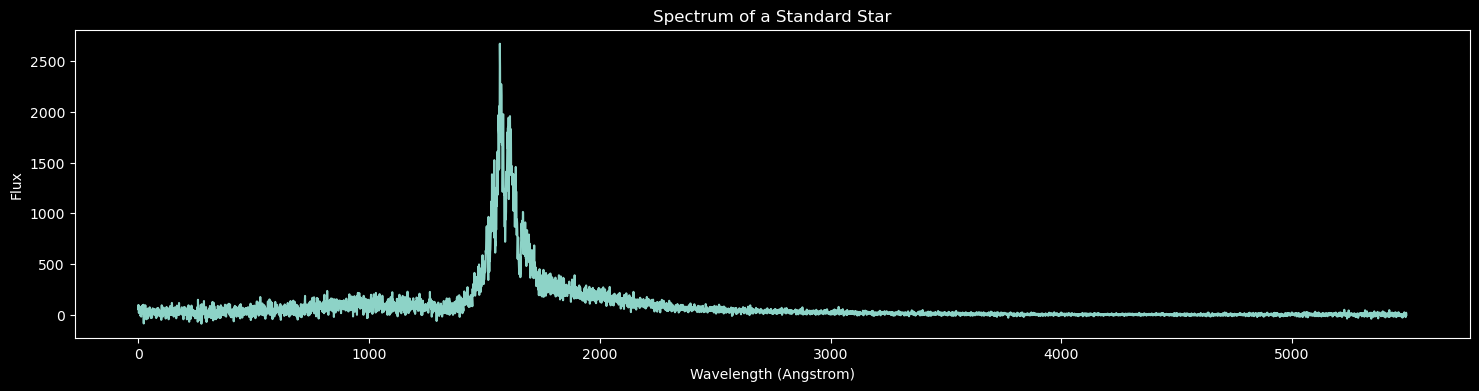

In [19]:
import matplotlib.pyplot as plt
from astropy.io import fits

plt.figure(figsize=(18, 4))  
data = np.flip(hdul[0].data[1800:1950, :], axis=1)
header = hdul[0].header

# 필요한 데이터 추출
wavelength = data[0,:]
flux = data[1]

# 플롯 생성
plt.plot(flux)
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux')
plt.title('Spectrum of a Standard Star')
plt.show()

# Spectroscopic Data Reduction Part 1: Tracing


## Authors
Adam Ginsburg, Kelle Cruz, Lia Corrales, Jonathan Sick, Adrian Price-Whelan

## Learning Goals
* Open a two-dimensional spectrum from an image file (bitmap)
* Fit a spectroscopic trace


## Keywords
Spectroscopy

## Summary
This tutorial will walk through the derivation of a spectroscopic trace model and extraction using astropy tools.

A spectroscopic trace is the path of a point source (star) spectrum through a two-dimensional dispersed spectrum.  The trace is needed because, in general, spectra are not perfectly aligned with the axes of a detector.

# Step 1: Examine the spectrum

We'll work with a 2D spectrum that contains *no* attached metadata, so we have to infer many of the features ourselves.

All we know is that this is a spectrum of a star, Aldebaran.

Our data are in the form of `.bmp` (bitmap) files, so we need PIL (Python Imaging Library) to open them.

While `.bmp` files are not astronomical standard FITS files, as are commonly delivered from professional observatories, image formats like `.bmp`, `.jpg`, `.raw`, `.png`, etc. produced by consumer cameras may also be used for spectroscopy.

In this case, our images are monochromatic, which is similar to standard FITS images.

In [20]:
# from PIL import Image
# import numpy as np

# import pylab as pl
# plt.rcParams['image.origin'] = 'lower'
# plt.matplotlib.style.use('dark_background') # Optional!

In [21]:
# spectrum_filename = "aldebaran_3s_1.bmp"

In [22]:
# hdul = Image.open(spectrum_filename)

In [23]:
# because this is an image, simply entering on the command line will show it
hdul

In [24]:
# our data are unsigned 8-bit integers (0-255) representing a monochromatic image
# we can see this by printing the array version of the image
# we can also see its shape, verifying that it is indeed 2-dimensional
# hdul[0].data = np.array(hdul[0].data)
# hdul[0].data, hdul[0].data.shape

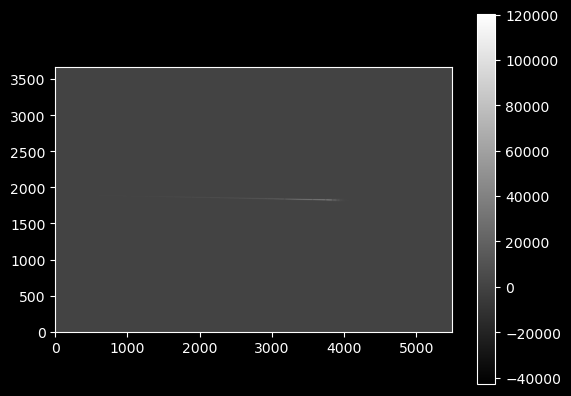

In [25]:
# but we'd like to see it with axes labeled
plt.imshow(hdul[0].data, cmap='gray')
plt.colorbar(); # the semicolon at the end of the last line prevents ipython from printing out the object

The main goal of the trace is to obtain a model `f(x)` defining the vertical position of the light (the signal) along the detector.

We're going to start by assuming that wavelength dispersion is in the X-direction and the Y-direction is entirely spatial.  

This is an approximation made by inspecting the image by eye.

# Step 2a. Try to find the spine to trace using argmax

To obtain the trace, we first measure the Y-value at each X-value.  we'll start with the trivial approach of using `argmax`:

In [26]:
yvals = np.argmax(hdul[0].data, axis=0)
xvals = np.arange(hdul[0].data.shape[1])

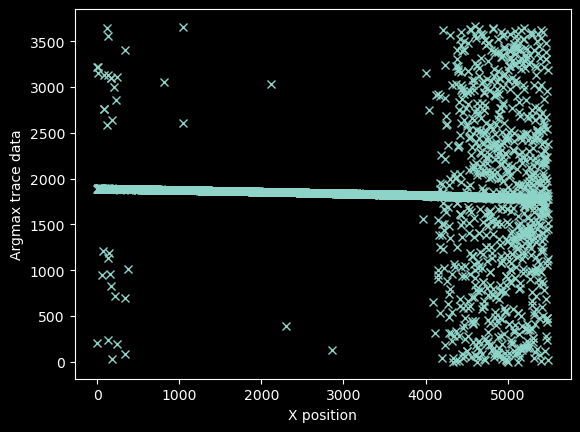

In [27]:
plt.plot(xvals, yvals, 'x')
plt.ylabel("Argmax trace data")
plt.xlabel("X position");

There's a pretty clear line going through the center, which represents our signal, but there are also a lot of erroneous data points.

We can get rid of most of the bad data just by filtering it out using a ``pixel mask``

In [28]:
bad_pixels = (yvals < 400) | (yvals > 500)

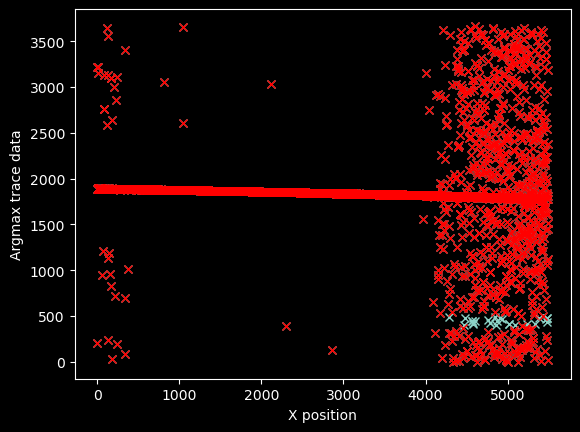

In [29]:
plt.plot(xvals, yvals, 'x')
plt.plot(xvals[bad_pixels], yvals[bad_pixels], 'rx')
plt.ylabel("Argmax trace data")
plt.xlabel("X position");

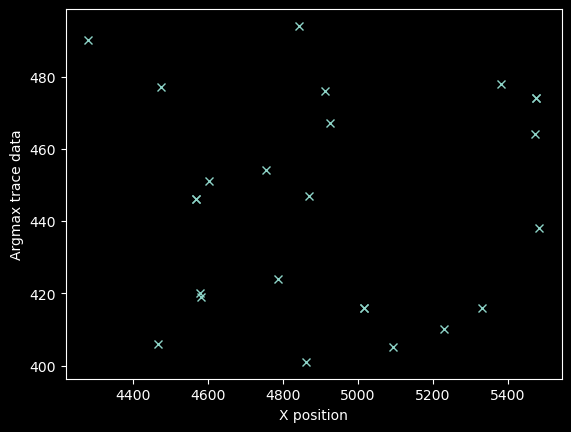

In [30]:
plt.plot(xvals[~bad_pixels], yvals[~bad_pixels], 'x')
plt.ylabel("Argmax trace data")
plt.xlabel("X position");

We can be a little more precise by 'zooming in' along the y-axis, so we refine the mask again to be over a narrower range:

In [35]:
bad_pixels = (yvals < 1750) | (yvals > 1800)

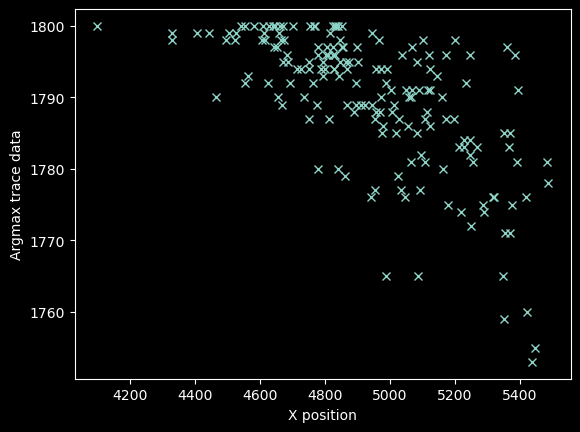

In [36]:
plt.plot(xvals[~bad_pixels], yvals[~bad_pixels], 'x')
plt.ylabel("Argmax trace data")
plt.xlabel("X position");

The stuff at x>1100 looks bad, but there's still signal out there.

We can see there is clear signal out to nearly pixel ~1400:

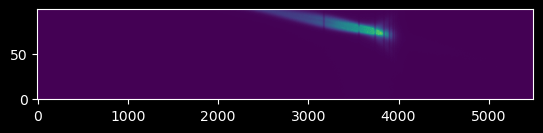

In [37]:
plt.imshow(hdul[0].data[1750:1850,:])
plt.gca().set_aspect(10)

# Step 2b: Use moment analysis to extract a spine to trace

We can use [moments](https://en.wikipedia.org/wiki/Moment_(mathematics)) to provide a different, possibly better, estimate of where the trace's center is.
The advantage of moment analysis is that we're using all of the data to estimate the vertical position, not just the single brightest value, which is what we used above.

Note that we need to subtract off the background to avoid a bias toward the center, so we use the median of the whole image as our background estimate.

(the first-order moment is the intensity-weighted mean position, 
$$m_1 = \frac{\Sigma_i x_i f(x_i)}{\Sigma_i f(x_i)}$$
where $x_i$ is the position and $f({x_i})$ is the intensity at that position.  $f(x_i)$ must be zero in the signal-free region for $m_1$ to return an accurate estimate of the location of the peak)

In [38]:
# we use a cutout around the traced line, so the Y-values are from that cutout
# the `repeat` command here is used to extend our Y-axis position values, which are 1750, 426, ... 1850
# along the X-direction.  The indexing with [:, None] adds a "dummy" axis along the second (x) dimension,
# then `repeat` copies our Y-axis values.  The resulting array has the same shape as our weight array,
# which is hdul[0].data[1750:1850, :] minus the median
yaxis = np.repeat(np.arange(1750, 1850)[:,None],
                  hdul[0].data.shape[1], axis=1)
background = np.median(hdul[0].data)
# moment 1 is the data-weighted average of the Y-axis coordinates
weighted_yaxis_values = np.average(yaxis, axis=0,
                                   weights=hdul[0].data[1750:1850,:] - background)

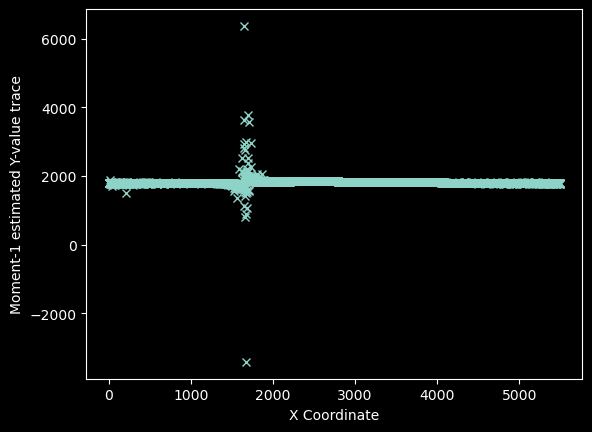

In [39]:
plt.plot(xvals, weighted_yaxis_values, 'x')
plt.xlabel("X Coordinate")
plt.ylabel("Moment-1 estimated Y-value trace");

Overplot the "weighted", centroid locations on the data to verify they look reasonable.

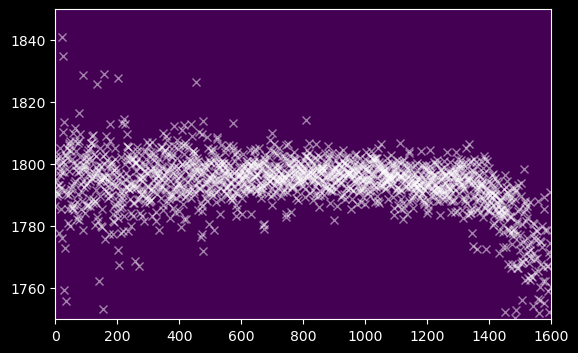

In [40]:
# we need to use the 'extent' keyword to have the axes correctly labeled
plt.imshow(hdul[0].data[1750:1850,:],
          extent=[0,hdul[0].data.shape[1],1750,1850])
plt.gca().set_aspect(10) # we stretch the image out by 10x in the y-direction
plt.plot(xvals, weighted_yaxis_values, 'wx', alpha=0.5)
plt.axis((0,1600,1750,1850));

We can also compare the argmax and weighted approaches.  They agree well at x<1200, but there are simply more points from the weighted approach at x>1200.

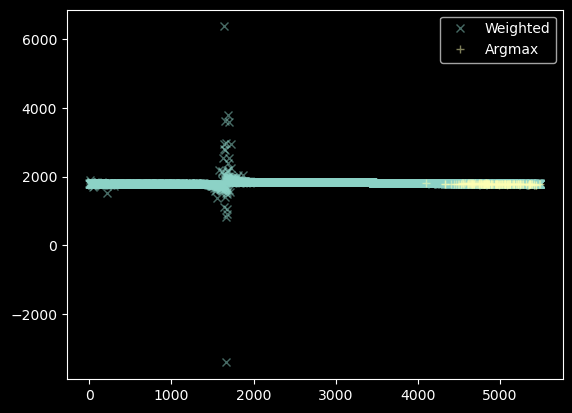

In [41]:
plt.plot(xvals, weighted_yaxis_values, 'x', label="Weighted", alpha=0.5)
plt.plot(xvals[~bad_pixels], yvals[~bad_pixels], '+', label="Argmax", alpha=0.5)
plt.legend(loc='best');

That's a decent set of data, we'll use the moments instead of the argmax.  There's still some data to flag out, though:

In [42]:
bad_moments = (weighted_yaxis_values > 460) | (weighted_yaxis_values < 430)

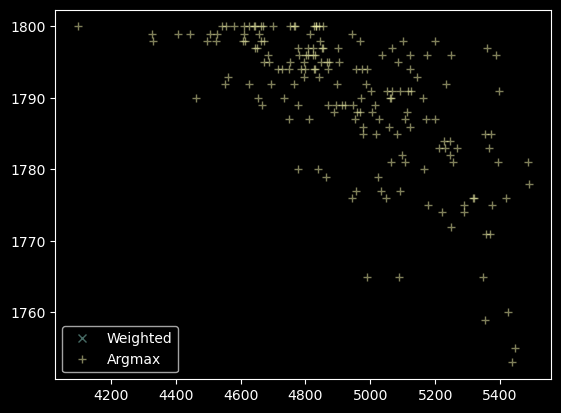

In [43]:
plt.plot(xvals[~bad_moments], weighted_yaxis_values[~bad_moments], 'x', label="Weighted", alpha=0.5)
plt.plot(xvals[~bad_pixels], yvals[~bad_pixels], '+', label="Argmax", alpha=0.5)
plt.legend(loc='best');

# Step 3. Fit the trace profile

We want a model `f(x)` that gives the y-value of the centroid as a function of x.

In [44]:
from astropy.modeling.polynomial import Polynomial1D
from astropy.modeling.fitting import LinearLSQFitter

In [45]:
# We fit a 2nd-order polynomial
polymodel = Polynomial1D(degree=2)
linfitter = LinearLSQFitter()
fitted_polymodel = linfitter(polymodel, xvals[~bad_moments], weighted_yaxis_values[~bad_moments])

/home/guitar79/anaconda3/envs/astro_Python_env/lib/python3.12/site-packages/astropy/modeling/fitting.py:830: RuntimeWarning: invalid value encountered in divide
  lacoef /= scl[:, np.newaxis] if scl.ndim < rhs.ndim else scl
 [astropy.modeling.fitting]


In [46]:
fitted_polymodel

<Polynomial1D(2, c0=nan, c1=nan, c2=nan)>

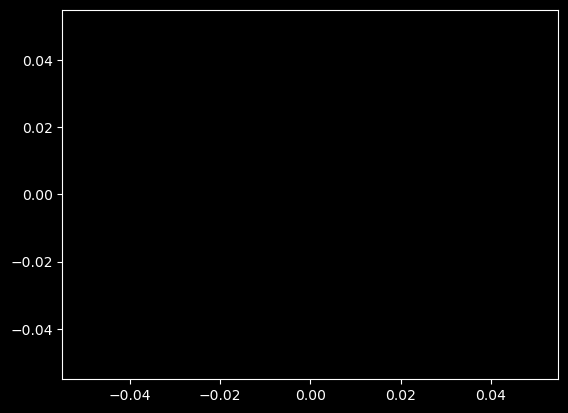

In [47]:
plt.plot(xvals[~bad_moments], weighted_yaxis_values[~bad_moments], 'x', alpha=0.5)
plt.plot(xvals, fitted_polymodel(xvals), color='r');

We plot and examine the residuals to visually inspect whether the fit is good:

In [ ]:
plt.plot(xvals[~bad_moments],
        weighted_yaxis_values[~bad_moments] - fitted_polymodel(xvals[~bad_moments]), 'x')
plt.ylabel("Residual (data-model)");

The curvature seen at the left is a sign of a suboptimal fit.  Specifically, curvature in the residual indicates that we need to use a _higher order_ model - i.e., we need more terms in the polynomial.  We change ``degree=2`` to ``degree=3``.

In [ ]:
polymodel = Polynomial1D(degree=3)
fitted_polymodel = linfitter(polymodel, xvals[~bad_moments], weighted_yaxis_values[~bad_moments])
fitted_polymodel

In [ ]:
plt.plot(xvals[~bad_moments], weighted_yaxis_values[~bad_moments], 'x', alpha=0.5)
plt.plot(xvals, fitted_polymodel(xvals), color='r');

In [ ]:
plt.plot(xvals[~bad_moments],
      weighted_yaxis_values[~bad_moments] - fitted_polymodel(xvals[~bad_moments]), 'x')
plt.ylabel("Residual (data-model)");

Arguably, we should toss out the data at >1400 pixels since there's no clear signal there.  We'll come back to this...

In [ ]:
plt.imshow(hdul[0].data[1750:1850,:],
          extent=[0,hdul[0].data.shape[1],1750,1850])
plt.gca().set_aspect(10);

Again, we should verify the trace by overplotting on the original data:

In [ ]:
plt.imshow(hdul[0].data[1750:1850,:], extent=[0,hdul[0].data.shape[1],1750,1850])
plt.gca().set_aspect(10)
plt.plot(xvals, fitted_polymodel(xvals), 'w')
plt.axis((0,1600,1750,1850));

Seeing the curve up in the model to the right - which we do not observe in the data - suggests we should re-fit without including the x>1200 data at all:

In [ ]:
polymodel = Polynomial1D(degree=3)
fitted_polymodel = linfitter(polymodel, xvals[(~bad_moments) & (xvals < 1200)],
                             weighted_yaxis_values[(~bad_moments) & (xvals < 1200)])
fitted_polymodel

We now have a satisfactory fit:

In [ ]:
plt.imshow(hdul[0].data[1750:1850,:], extent=[0,hdul[0].data.shape[1],1750,1850])
plt.gca().set_aspect(10)
plt.plot(xvals, fitted_polymodel(xvals), 'w')
plt.axis((0,1600,1750,1850));

In [ ]:
plt.plot(xvals[~bad_moments], weighted_yaxis_values[~bad_moments], 'x', alpha=0.5)
plt.plot(xvals, fitted_polymodel(xvals), color='r');

In [ ]:
plt.plot(xvals[~bad_moments & (xvals < 1200)],
        weighted_yaxis_values[~bad_moments & (xvals < 1200)] - fitted_polymodel(xvals[~bad_moments & (xvals < 1200)]), 'x')
plt.plot(xvals[~bad_moments & (xvals > 1200)],
        weighted_yaxis_values[~bad_moments & (xvals > 1200)] - fitted_polymodel(xvals[~bad_moments & (xvals > 1200)]), 'r+', alpha=0.5)
plt.ylim(-5, 5)
plt.ylabel("Residual (data-model)");

# Step 4. Obtain a trace profile

Now we can extract the data along that trace.

We want to take a "profile" of the trace to see how many pixels on either side of the line we should include.

In [ ]:
plt.imshow(hdul[0].data[1750:1850,:], extent=[0,hdul[0].data.shape[1],1750,1850])
plt.gca().set_aspect(10)
plt.fill_between(xvals, fitted_polymodel(xvals)-15,
                fitted_polymodel(xvals)+15,
                color='orange', alpha=0.5)
plt.axis((0,1600,1750,1850));

In [ ]:
# start by taking +/- 15 pixels
npixels_to_cut = 15
trace_center = fitted_polymodel(xvals)
cutouts = np.array([hdul[0].data[int(yval)-npixels_to_cut:int(yval)+npixels_to_cut, ii]
                    for yval, ii in zip(trace_center, xvals)])
cutouts.shape

That last step deserves some explanation:
```
cutouts = np.array([hdul[0].data[int(yval)-npixels_to_cut:int(yval)+npixels_to_cut, ii]
                    for yval, ii in zip(trace_center, xvals)])
```

* `[... for yval, ii in zip(trace_center, xvals)]` takes each trace y-value and each x-value and 'zips' them together, so each iteration of the for loop has one x, y pair
* `hdul[0].data[int(yval)-npixels_to_cut:int(yval)+npixels_to_cut, ii]` is taking a single pixel along the x-direction (the second dimension, `ii`) and a range of pixels along the y-direction, i.e., `y+/-n`
* these are put together in a loop, so we have a y+/-n pixel region for each x-pixel
* then we make them all into an array


We can see the result visually:

In [ ]:
ax1 = plt.subplot(2,1,1)
ax1.imshow(hdul[0].data[1750:1850,:], extent=[0,hdul[0].data.shape[1],1750,1850])
ax1.set_aspect(10)
ax1.set_title("We go from this...")
ax2 = plt.subplot(2,1,2)
ax2.imshow(cutouts.T)
ax2.set_title("...to this")
ax2.set_aspect(10)

Then we average along the X-direction to get the trace profile:

In [ ]:
mean_trace_profile = (cutouts - background).mean(axis=0)
trace_profile_xaxis = np.arange(-npixels_to_cut, npixels_to_cut)
plt.plot(trace_profile_xaxis, mean_trace_profile)
plt.xlabel("Distance from center")
plt.ylabel("Average source profile");

We want to fit that profile with a Gaussian for future use,  so we import the Gaussian model profile and non-linear fitter and run a fit:

In [ ]:
from astropy.modeling.models import Gaussian1D
from astropy.modeling.fitting import LevMarLSQFitter
lmfitter = LevMarLSQFitter()
guess = Gaussian1D(amplitude=mean_trace_profile.max(), mean=0, stddev=5)
fitted_trace_profile = lmfitter(model=guess, x=trace_profile_xaxis, y=mean_trace_profile)
model_trace_profile = fitted_trace_profile(trace_profile_xaxis)
fitted_trace_profile

In [ ]:
plt.plot(trace_profile_xaxis, mean_trace_profile, label='data')
plt.plot(trace_profile_xaxis, model_trace_profile, label='model')
plt.legend(loc='best')
plt.xlabel("Distance from center")
plt.ylabel("Average source profile");

Both the empirical trace profile `mean_trace_profile` and the modeled `model_trace_profile` can reasonably be used; the latter is more convenient to serialize (i.e., write to disk or on paper)

# Step 5. Extract the traced spectrum

We can obtain our spectrum by directly averaging the pixels along the trace:

In [ ]:
average_spectrum = (cutouts - background).mean(axis=1)
plt.plot(average_spectrum);

Or, we can obtain our spectrum by taking the trace-weighted average:    

In [ ]:
trace_avg_spectrum = np.array([np.average(
    hdul[0].data[int(yval)-npixels_to_cut:int(yval)+npixels_to_cut, ii] - background,
    weights=mean_trace_profile)
                               for yval, ii in zip(trace_center, xvals)])

We can also do this with the Gaussian weights:

In [ ]:
gaussian_trace_avg_spectrum = np.array([np.average(
    hdul[0].data[int(yval)-npixels_to_cut:int(yval)+npixels_to_cut, ii] - background,
    weights=model_trace_profile)
                               for yval, ii in zip(trace_center, xvals)])

In [ ]:
plt.plot(average_spectrum, label="Direct Average")
plt.plot(trace_avg_spectrum, label='Trace-weighted average')
plt.plot(gaussian_trace_avg_spectrum, label='Gaussian-model-Trace-weighted average', alpha=0.5, linewidth=0.5, color='r')
plt.legend(loc='best');

In general, the trace-weighted average will have higher signal-to-noise, as seen here (while we haven't measured the noise, it is approximately constant across the image).

Note that the Gaussian model and the direct trace yield nearly identical results

# Step 6: Repeat for another star

In this last step, we go through all the above steps again for another star (Deneb), but with less explanation.

In [ ]:
hdul[0].data_2 = np.array(Image.open('deneb_3s_13.63g_1.bmp'))
plt.imshow(hdul[0].data_2, cmap='gray')
plt.colorbar();

In [ ]:
plt.imshow(hdul[0].data_2[470:520,:], extent=[0,1600,470,520])
plt.gca().set_aspect(10)

In [ ]:
yaxis2 = np.repeat(np.arange(470, 520)[:,None], hdul[0].data_2.shape[1], axis=1)
weighted_yaxis_values2 = np.average(yaxis2, axis=0, weights=hdul[0].data_2[470:520,:] - np.median(hdul[0].data_2))
polymodel2 = Polynomial1D(degree=3)
fitted_polymodel2 = linfitter(polymodel2, xvals, weighted_yaxis_values2)
trace_center2 = fitted_polymodel2(xvals)

In [ ]:
plt.plot(xvals, weighted_yaxis_values2, 'x', alpha=0.5)
plt.plot(xvals, trace_center2, color='r');

In [ ]:
plt.imshow(hdul[0].data_2[470:520,:], extent=[0,1600,470,520])
plt.plot(xvals, weighted_yaxis_values2, 'w+', alpha=0.25)
plt.plot(xvals, trace_center2, color='r')
plt.gca().set_aspect(10)

In [ ]:
spectrum2 = np.array([np.average(hdul[0].data_2[int(yval)-npixels_to_cut:int(yval)+npixels_to_cut, ii] - np.median(hdul[0].data_2),
                                weights=mean_trace_profile)
                     for yval, ii in zip(trace_center2, xvals)])

In [ ]:
plt.plot(spectrum2);

In the next tutorial, Spectroscopic Data Reduction 2, we'll work on the wavelength calibration.